In [5]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 660.6 kB/s eta 0:00:59
   ---------------------------------------- 0.1/38.6 MB 656.4 kB/s eta 0:00:59
   ---------------------------------------- 0.3/38.6 MB 2.6 MB/s eta 0:00:15
    --------------------------------------- 0.7/38.6 MB 4.7 MB/s eta 0:00:09
   - -------------------------------------- 1.3/38.6 MB 5.8 MB/s eta 0:00:07
   - -------------------------------------- 1.5/38.6 MB 5.2 MB/s eta 0:00:08
   -- ------------------------------------- 2.2/38.6 MB 7.1 MB/s eta 0:00:06
   -- ------------------------------------- 2.6/38.6 MB 7.6 MB/s eta 0:00:05
   -- ------------------------------------- 2.9/38.6 MB 7.4 MB/s eta 0:00:05
   -- ------

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import tensorflow as tf
from keras.models import load_model
from glob import glob
import matplotlib.pyplot as plt
import os
import cv2

import zipfile

dataset_file = 'brain-tumor-mri-dataset.zip'

extract_dir = '/kaggle/working/dataset'

os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(dataset_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

train_dir = os.path.join(extract_dir, 'Training')
test_dir = os.path.join(extract_dir, 'Testing')

In [2]:
train_dir = "D:/Gucci/MCA/Semester 2/PDT/dataset/Training"
test_dir = "D:/Gucci/MCA/Semester 2/PDT/dataset/Testing"

In [3]:
IMAGE_SIZE = [224, 224]

In [4]:
resnet = ResNet50(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

for layer in resnet.layers:
    layer.trainable = False

In [5]:
folders = glob(f'{train_dir}/*')
print(len(folders))

4


In [42]:
print(folders)

['D:/Gucci/MCA/Semester 2/PDT/dataset/Training\\glioma', 'D:/Gucci/MCA/Semester 2/PDT/dataset/Training\\meningioma', 'D:/Gucci/MCA/Semester 2/PDT/dataset/Training\\notumor', 'D:/Gucci/MCA/Semester 2/PDT/dataset/Training\\pituitary']


In [6]:
x = Flatten()(resnet.output)
x = Dense(1000, activation = 'relu')(x)
prediction = Dense(len(folders), activation = 'softmax')(x)

model = Model(inputs = resnet.input, outputs = prediction)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 123,944,716 (472.81 MB)

 Trainable params: 100,357,004 (382.83 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [7]:
from keras import optimizers

In [8]:
model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.Adam(learning_rate = 0.001), metrics = ['accuracy', 'auc', 'precision', 'recall'])

train_datagen = ImageDataGenerator(rescale = 1./255, width_shift_range = 0.1, height_shift_range = 0.1)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [28]:
training_set = train_datagen.flow_from_directory(train_dir, 
                                                 target_size = (224, 224),
                                                 batch_size = 32, 
                                                 shuffle = True,
                                                 seed = 42,
                                                 class_mode = 'categorical')

testing_set = test_datagen.flow_from_directory(test_dir, 
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               shuffle = True,
                                               seed = 42,
                                               class_mode = 'categorical')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [11]:
!pip install --upgrade keras

In [30]:
r = model.fit(training_set, validation_data = testing_set,
              epochs = 40,
              steps_per_epoch = len(training_set) // 32,
              validation_steps = len(testing_set) // 32)

Epoch 1/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7731 - auc: 0.9227 - loss: 0.6850 - precision: 0.8061 - recall: 0.6783 - val_accuracy: 0.6875 - val_auc: 0.9461 - val_loss: 0.5574 - val_precision: 0.7097 - val_recall: 0.6875
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7582 - auc: 0.9337 - loss: 0.5970 - precision: 0.7694 - recall: 0.7270 - val_accuracy: 0.7812 - val_auc: 0.9264 - val_loss: 0.7013 - val_precision: 0.8000 - val_recall: 0.7500
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7476 - auc: 0.9286 - loss: 0.6425 - precision: 0.7693 - recall: 0.6915 - val_accuracy: 0.7812 - val_auc: 0.9329 - val_loss: 0.6127 - val_precision: 0.7857 - val_recall: 0.6875
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7498 - auc: 0.9442 - loss: 0.5603 - precision: 0.7624 - recall: 0.7426 - val_accuracy: 0.7500 - val_auc: 0.9401 - val_loss: 0.5924 - val_precision: 0.7419 - val_recall: 0.7188
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step 

In [18]:
# Train the model using the training_set
r = model.fit(training_set, epochs=50, steps_per_epoch=len(training_set) // 32)

# Evaluate the model using the testing_set
test_acc, test_auc, test_loss, test_pr, test_rec = model.evaluate(testing_set, verbose=2, steps=len(testing_set) // 32)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7016 - auc: 0.9030 - loss: 0.7938 - precision: 0.7732 - recall: 0.6769
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7246 - auc: 0.9175 - loss: 0.7090 - precision: 0.7359 - recall: 0.6633
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6741 - auc: 0.9173 - loss: 0.6688 - precision: 0.7199 - recall: 0.5937
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7283 - auc: 0.9255 - loss: 0.6552 - precision: 0.7631 - recall: 0.7025
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7286 - auc: 0.9232 - loss: 0.6712 - precision: 0.7868 - recall: 0.6776
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6484 - auc: 0.8868 - loss: 0.8280 - precision: 0.6827 - recall: 0.6227
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7816 - auc: 0.9409 - loss: 0.5885 - precision: 0.8427 - recall: 0.6774
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7734 - a

41/41 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step


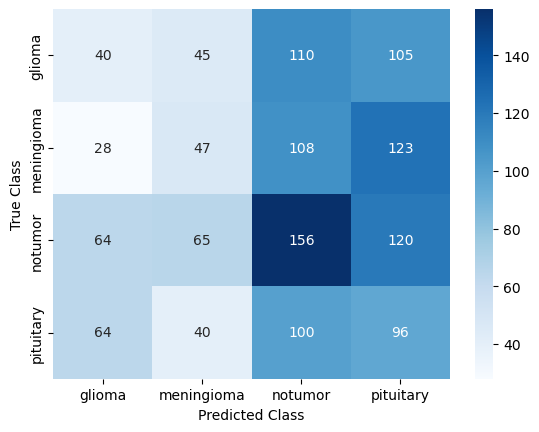

In [45]:
import numpy as np
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt

predictions = model.predict(testing_set)

predicted_classes = np.argmax(predictions, axis=1)

true_classes = testing_set.labels

confusion_matrix = metrics.confusion_matrix(true_classes, predicted_classes)
class_labels = ["glioma", "meningioma", "notumor", "pituitary"]

sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# Calculate precision, recall, and F1-score
precision = metrics.precision_score(true_classes, predicted_classes, average=None)
recall = metrics.recall_score(true_classes, predicted_classes, average=None)
f1_score = metrics.f1_score(true_classes, predicted_classes, average=None)

# Print precision, recall, and F1-score for each class
for i, label in enumerate(class_labels):
    print(f"Class: {label}")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1-score: {f1_score[i]}\n")


# Calculate overall metrics
overall_precision = metrics.precision_score(true_classes, predicted_classes, average='weighted')
overall_recall = metrics.recall_score(true_classes, predicted_classes, average='weighted')
overall_f1_score = metrics.f1_score(true_classes, predicted_classes, average='weighted')

print("Overall Metrics:")
print(f"Precision: {overall_precision}")
print(f"Recall: {overall_recall}")
print(f"F1-score: {overall_f1_score}")


Class: glioma
Precision: 0.20408163265306123
Recall: 0.13333333333333333
F1-score: 0.16129032258064516

Class: meningioma
Precision: 0.23857868020304568
Recall: 0.15359477124183007
F1-score: 0.18687872763419486

Class: notumor
Precision: 0.3291139240506329
Recall: 0.3851851851851852
F1-score: 0.3549488054607508

Class: pituitary
Precision: 0.21621621621621623
Recall: 0.32
F1-score: 0.25806451612903225

Overall Metrics:
Precision: 0.2535359039232811
Recall: 0.2585812356979405
F1-score: 0.24923387374566813


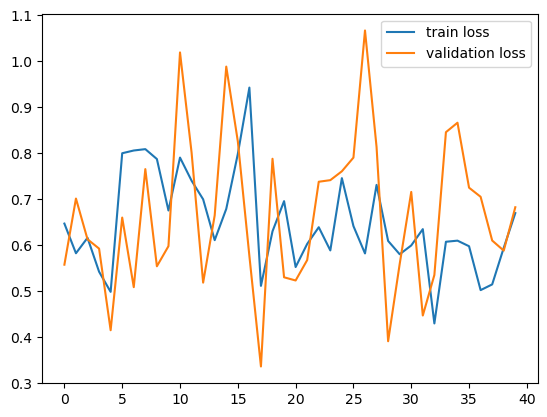

In [32]:
# Loss curve

plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

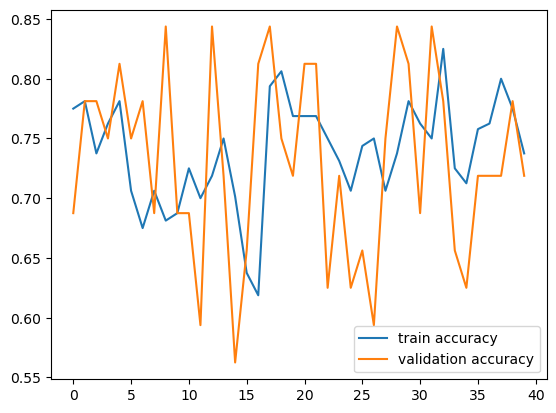

In [33]:
# Accuracy curve

plt.plot(r.history['accuracy'], label = 'train accuracy')
plt.plot(r.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

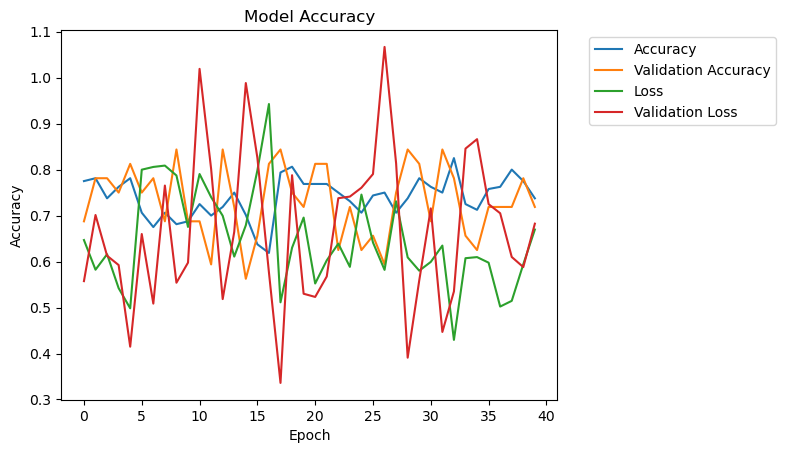

In [34]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"], loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

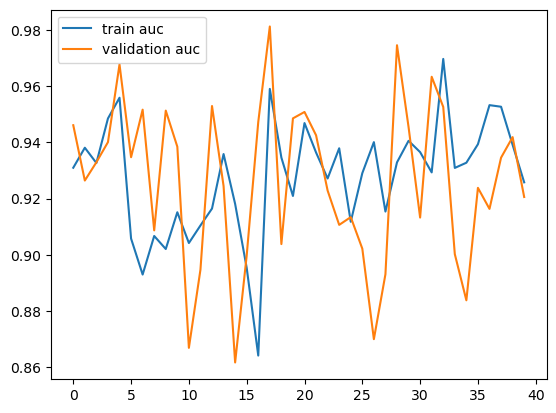

In [35]:
# AUC curve

plt.plot(r.history['auc'], label = 'train auc')
plt.plot(r.history['val_auc'], label = 'validation auc')
plt.legend()
plt.show()

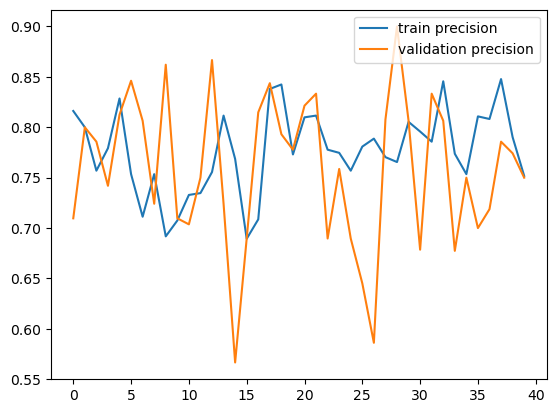

In [36]:
# Precision curve

plt.plot(r.history['precision'], label = 'train precision')
plt.plot(r.history['val_precision'], label = 'validation precision')
plt.legend()
plt.show()

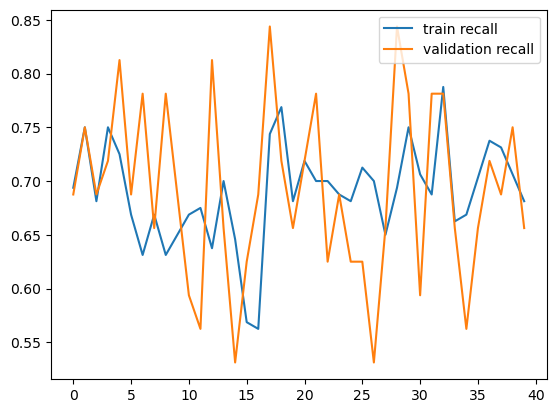

In [37]:
# Recall curve

plt.plot(r.history['recall'], label = 'train recall')
plt.plot(r.history['val_recall'], label = 'validation recall')
plt.legend()
plt.show()

In [47]:
import pickle

model_res_tacc = r.history["accuracy"]
model_res_vacc = r.history["val_accuracy"]
model_res_tloss = r.history["loss"]
model_res_vloss = r.history["val_accuracy"]

metrics_dict = {
    'ResNet50': {
        'train accuracies': model_res_tacc,
        'val accuracies': model_res_vacc,
        'train losses': model_res_tloss,
        'val losses': model_res_vloss
    }
}

with open('model_metrics.pkl', 'wb') as file:
    pickle.dump(metrics_dict, file)